In [30]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [31]:
D = sp.symbols('D')
L_1 = sp.symbols('L1')
L_2 = sp.symbols('L2')
R_1 = sp.symbols('R1')
R_2 = sp.symbols('R2')
n_1 = sp.symbols('n')
l = sp.symbols('l')
tita = sp.symbols('\\theta')

In [32]:
matriz_cristal = sp.Matrix([[1,D/n_1],[0,1]])
matriz_n1n2 = sp.Matrix([[1,0],[0,1/n_1]])
matriz_n2n1 = sp.Matrix([[1,0],[0,n_1]])
matriz_L1 = sp.Matrix([[1,L_1],[0,1]])
matriz_L2 = sp.Matrix([[1,L_2],[0,1]])
matriz_R1 = sp.Matrix([[1,0],[-2/R_1,1]])
matriz_R2 = sp.Matrix([[1,0],[-2/R_2,1]])

In [33]:
matriz_R2*matriz_L2*matriz_n2n1*matriz_cristal*matriz_n1n2*matriz_L1*matriz_R1*matriz_L1*matriz_cristal*matriz_L2

Matrix([
[                              1 - 2*(L1 + (D/n + L2*n)/n)/R1,                                                                                                                    D*(1 - 2*(L1 + (D/n + L2*n)/n)/R1)/n + L1*(1 - 2*(L1 + (D/n + L2*n)/n)/R1) + L1 + L2*(1 - 2*(L1 + (D/n + L2*n)/n)/R1) + (D/n + L2*n)/n],
[-2/R2 - 2*(-2*L1/R2 + (-2*D/(R2*n) + n*(-2*L2/R2 + 1))/n)/R1, D*(-2/R2 - 2*(-2*L1/R2 + (-2*D/(R2*n) + n*(-2*L2/R2 + 1))/n)/R1)/n + L1*(-2/R2 - 2*(-2*L1/R2 + (-2*D/(R2*n) + n*(-2*L2/R2 + 1))/n)/R1) - 2*L1/R2 + L2*(-2/R2 - 2*(-2*L1/R2 + (-2*D/(R2*n) + n*(-2*L2/R2 + 1))/n)/R1) + (-2*D/(R2*n) + n*(-2*L2/R2 + 1))/n]])

In [34]:
R_2_x = R_2*sp.cos(tita/2)
R_2_y = R_2/sp.cos(tita/2)
matriz_cristal = sp.Matrix([[1,D/n_1],[0,1]])
matriz_n1n2 = sp.Matrix([[1,0],[0,1/n_1]])
matriz_n2n1 = sp.Matrix([[1,0],[0,n_1]])
matriz_L1 = sp.Matrix([[1,L_1],[0,1]])
matriz_L2 = sp.Matrix([[1,L_2],[0,1]])
matriz_R1 = sp.Matrix([[1,0],[0,1]])
matriz_R2_x = sp.Matrix([[1,0],[-2/R_2_x,1]])
matriz_R2_y = sp.Matrix([[1,0],[-2/R_2_y,1]])
matriz_R3 = sp.Matrix([[1,0],[0,1]])

In [35]:
camino_x = matriz_L2*matriz_R2_x*matriz_L1*matriz_cristal*matriz_cristal*matriz_L1*matriz_R2_x*matriz_L2
camino_y = matriz_L2*matriz_R2_y*matriz_L1*matriz_cristal*matriz_cristal*matriz_L1*matriz_R2_y*matriz_L2

In [36]:
(camino_x[0]+camino_x[3]).simplify().subs(tita,0)

2*(8*D*L2 - 4*D*R2 + 8*L1*L2*n - 4*L1*R2*n - 4*L2*R2*n + R2**2*n)/(R2**2*n)

In [37]:
R_2_x = R_2*sp.cos(tita/2)
R_2_y = R_2/sp.cos(tita/2)
matriz_cristal = sp.Matrix([[1,D/n_1],[0,1]])
matriz_L1 = sp.Matrix([[1,L_1],[0,1]])
matriz_L2 = sp.Matrix([[1,L_2-l],[0,1]])
matriz_l = sp.Matrix([[1,l],[0,1]])
matriz_R1 = sp.Matrix([[1,0],[0,1]])
matriz_R2_x = sp.Matrix([[1,0],[-2/R_2_x,1]])
matriz_R2_y = sp.Matrix([[1,0],[-2/R_2_y,1]])
matriz_R3 = sp.Matrix([[1,0],[0,1]])

In [38]:
camino_x = matriz_l*matriz_l*matriz_L2*matriz_R2_x*matriz_L1*matriz_cristal*matriz_cristal*matriz_L1*matriz_R2_x*matriz_L2
camino_y = matriz_l*matriz_l*matriz_L2*matriz_R2_y*matriz_L1*matriz_cristal*matriz_cristal*matriz_L1*matriz_R2_y*matriz_L2

In [95]:
cD = 2
cn_1 = 1.958
cR_2= 250
cL_2= 200
cL_1= 200
ctita= 50*3.14/180

In [100]:
def w(ll, camino, cD, cn_1, cR_2, cL_2, cL_1, ctita, lamnda=1064,n=1):
    AA,BB,CC,DD= sp.simplify(camino.subs([(D,cD),(n_1,cn_1),(R_2,cR_2),(L_1,cL_1),(L_2,cL_2),(tita,ctita)]))
    AA = float(AA.subs(l,ll))
    BB = float(BB.subs(l,ll))
    CC = float(CC.subs(l,ll))
    DD = float(DD.subs(l,ll))
    result_1 =np.sqrt(lamnda/(np.pi*n))
    result_2 =np.sqrt(abs(BB))/((1-((DD+AA)**2)/4)**(1/4))
    return result_1*result_2

In [105]:
ll = np.linspace(1,200, 200)
wx = []
wy = []
for lll in ll:
    wx.append(w(lll, camino_x, cD, cn_1, cR_2, cL_2, cL_1, ctita))
    wy.append(w(lll, camino_y, cD, cn_1, cR_2, cL_2, cL_1, ctita))

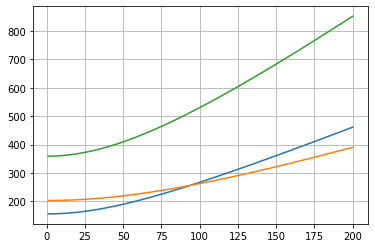

In [106]:
plt.plot(ll,wx)
plt.plot(ll,wy)
plt.plot(ll,np.array(wy)+np.array(wx))
plt.grid(True)
plt.show()